In [1]:
# import sys
# !{sys.executable} -m pip install sympy
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install matplotlib

In [2]:
import sympy as sym
import numpy as np
from sympy import lambdify
from numpy import linalg as LA
import matplotlib.pyplot as plt

#sym.init_printing(use_unicode=False, wrap_line=True)

### PS4
#### Ramsey model with an unaticipated and permanent shock to depreciation

In [3]:
#VARIABLES

beta = 0.95
#discount factor

theta = 1/beta - 1
#discount rate

sigma = 2
#utility curvature

alpha = 0.3
#exponent on capital

omega = 1
#productivity which is not even mentioned in the problem
#just omit it 

delta_L = 0.1
#old depreciation rate

delta_H = 0.2
#new depreciation rate

T = 50
#number of time periods to simulate

In [4]:
#utility function of ct
ct = sym.symbols('ct')
uct = (ct ** (1 - sigma) - 1 ) / (1 - sigma)
duct = sym.diff(uct)
dduct = sym.diff(duct)


In [5]:
#ct
uct = lambdify(ct, uct)
duct = lambdify(ct, duct)
dduct = lambdify(ct, dduct)

In [6]:
#production function of kt
kt = sym.symbols('kt')
fkt = kt ** alpha
dfkt = sym.diff(fkt)
ddfkt = sym.diff(dfkt)

In [7]:
#kt
fkt = lambdify(kt, fkt)
dfkt = lambdify(kt, dfkt)
ddfkt = lambdify(kt, ddfkt)

In [8]:
#initial steadystate
Kss_R1 = ( alpha / (theta + delta_L) )**(1/(1 - alpha))
Css_R1 = Kss_R1**alpha - delta_L*Kss_R1

#new steadystate
Kss_R2 = ( alpha / (theta + delta_H ))**(1/(1 - alpha))
Css_R2 = Kss_R2**alpha - delta_H*Kss_R2

#A matrix
coeff1_R2 = duct(Css_R2) * ddfkt(Kss_R2) / dduct(Css_R2)

A = np.zeros([2,2])
A[0, 0] = 1 + coeff1_R2/ (1 + theta)
A[0, 1] = -coeff1_R2
A[1, 0] = -1
A[1, 1] = 1 + theta
D_R2, V_R2 = LA.eig(A)



In [9]:
#CHOOSE STABLE EIGENVALUE & VERIFY
A_time_V = np.around(A.dot(V_R2[:,D_R2<1]), decimals=8)
lambda_time_V = np.around( V_R2[:,D_R2<1]* D_R2[D_R2<1], decimals=8)
print(A_time_V == lambda_time_V)

determinant = (V_R2[0,D_R2<1] / V_R2[1,D_R2<1]).item()
lamda = D_R2.item(np.where(D_R2<1)[0][0])


[[ True]
 [ True]]


In [10]:
#Simulating dynamics 
deltak = Kss_R1 - Kss_R2
deltac = determinant * deltak 
kplot = []
cplot = []

for i in range(T):
    kplot.append(deltak)
    cplot.append(deltac)
    
    deltak = A[1, :].dot([deltac, deltak])
    deltac = determinant * deltak
    
c_dev = np.array(cplot)
k_dev = np.array(kplot)

#Computing levels
c_sim = np.array(cplot) + Css_R2
k_sim = np.array(kplot) + Kss_R2

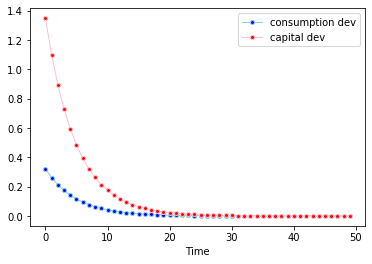

In [14]:
plt.plot(list(range(0, T)), c_dev, marker='o', markerfacecolor='blue', markersize=4, color='skyblue', linewidth=1, label='consumption dev')
plt.plot(list(range(0, T)), k_dev, marker='o', markerfacecolor='red', markersize=4, color='pink', linewidth=1, label='capital dev')
plt.xlabel('Time')
plt.legend()
plt.show()

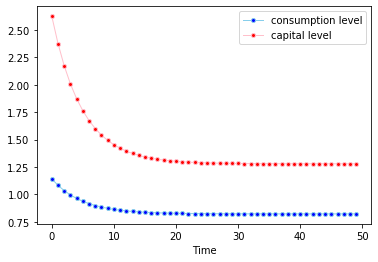

In [15]:
plt.plot(list(range(0, T)), c_sim, marker='o', markerfacecolor='blue', markersize=4, color='skyblue', linewidth=1, label='consumption level')
plt.plot(list(range(0, T)), k_sim, marker='o', markerfacecolor='red', markersize=4, color='pink', linewidth=1, label='capital level')
plt.xlabel('Time')
plt.legend()
plt.show()

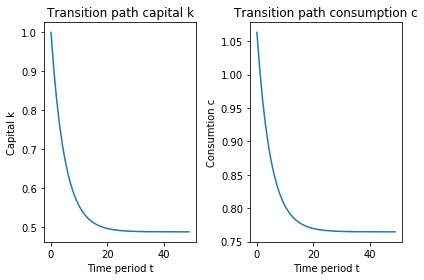

In [13]:
plt.subplot(1, 2, 1)
plt.plot( k_sim/Kss_R1)
plt.title('Transition path capital k')
plt.xlabel('Time period t')
plt.ylabel('Capital k')

plt.subplot(1, 2, 2)
plt.plot(c_sim/Css_R1)
plt.title('Transition path consumption c')
plt.xlabel('Time period t')
plt.ylabel('Consumtion c')
plt.tight_layout()
plt.show()